<a href="https://www.arduino.cc/"><img src="https://raw.githubusercontent.com/sandeepmistry/aimldevfest-workshop-2019/master/images/Arduino_logo_R_highquality.png" width=200/></a>
# Tiny ML on Arduino
## Gesture recognition tutorial
 * Sandeep Mistry - Arduino
 * Don Coleman - Chariot Solutions

 
https://github.com/arduino/ArduinoTensorFlowLiteTutorials/

## Setup Python Environment 

The next cell sets up the dependencies in required for the notebook, run it.

In [1]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.0.0-rc1

# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `punch.csv` and `flex.csv` files from your computer to the tab to upload them into colab.

# Graph Data (optional)

We'll graph the input files on two separate graphs, acceleration and gyroscope, as each data set has different units and scale.

/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/1291817060.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/1291817060.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/1291817060.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


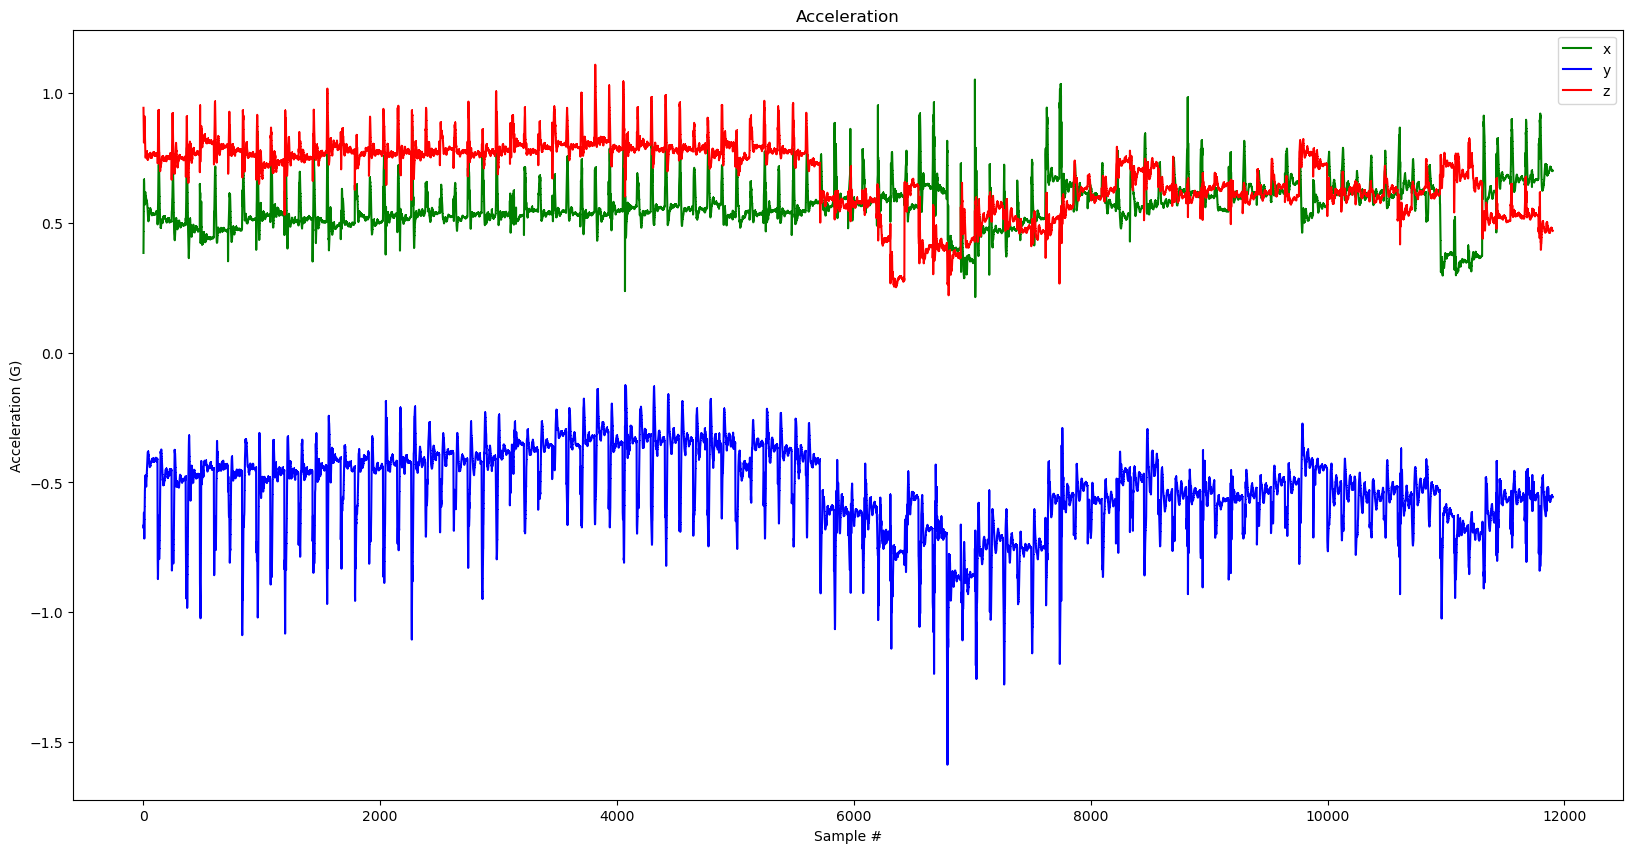

/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/1291817060.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/1291817060.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/1291817060.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


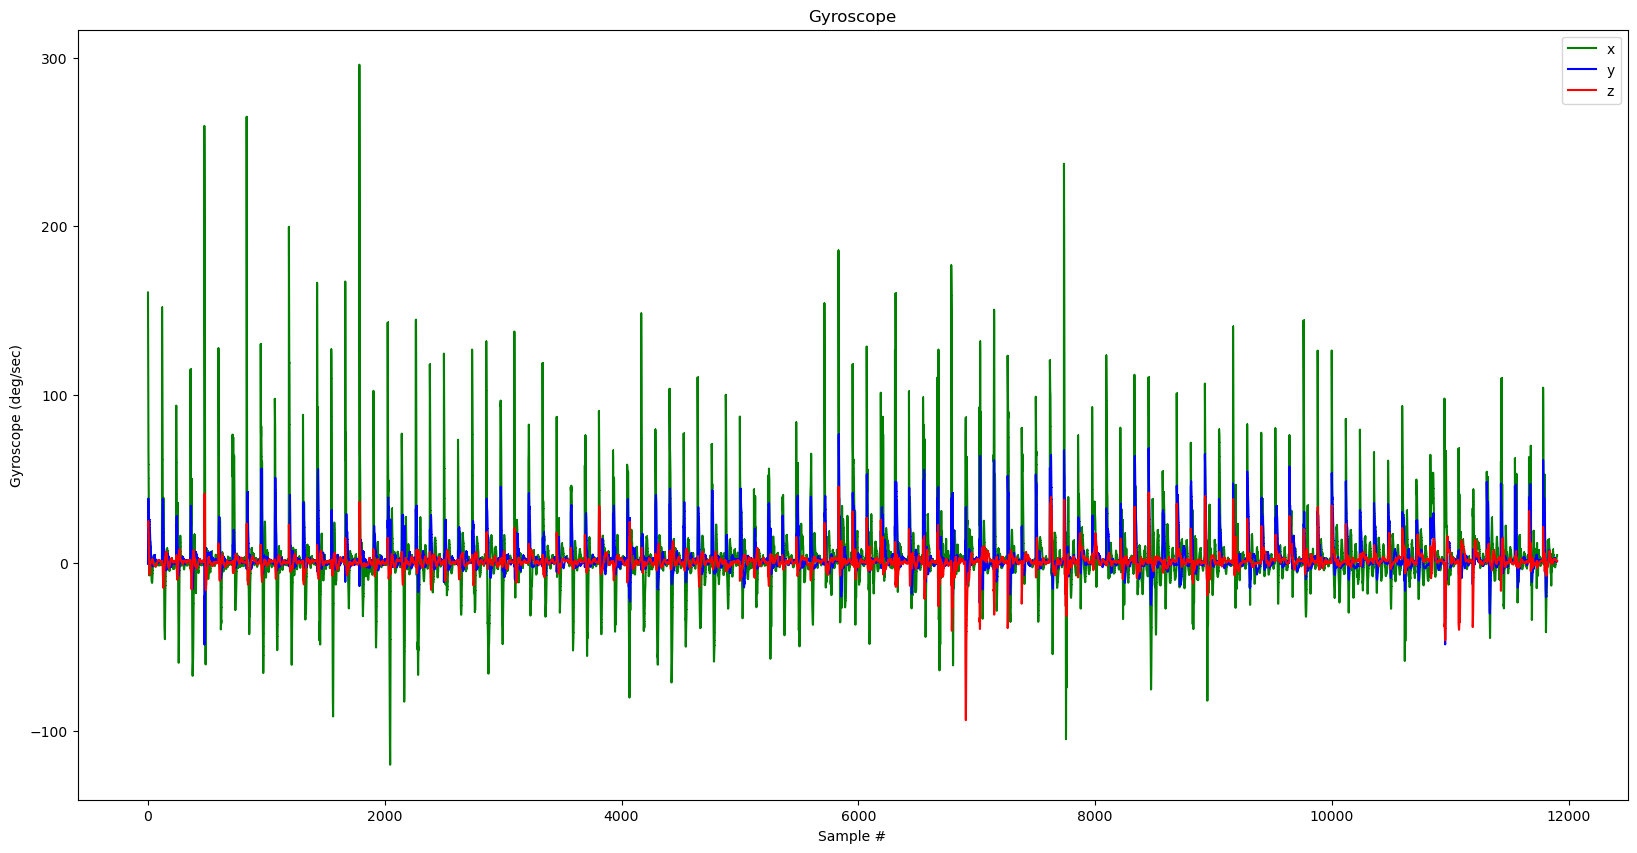

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "FINAL_FRONT_SLOUCH.csv"

df = pd.read_csv(filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/2880796761.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/2880796761.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/2880796761.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


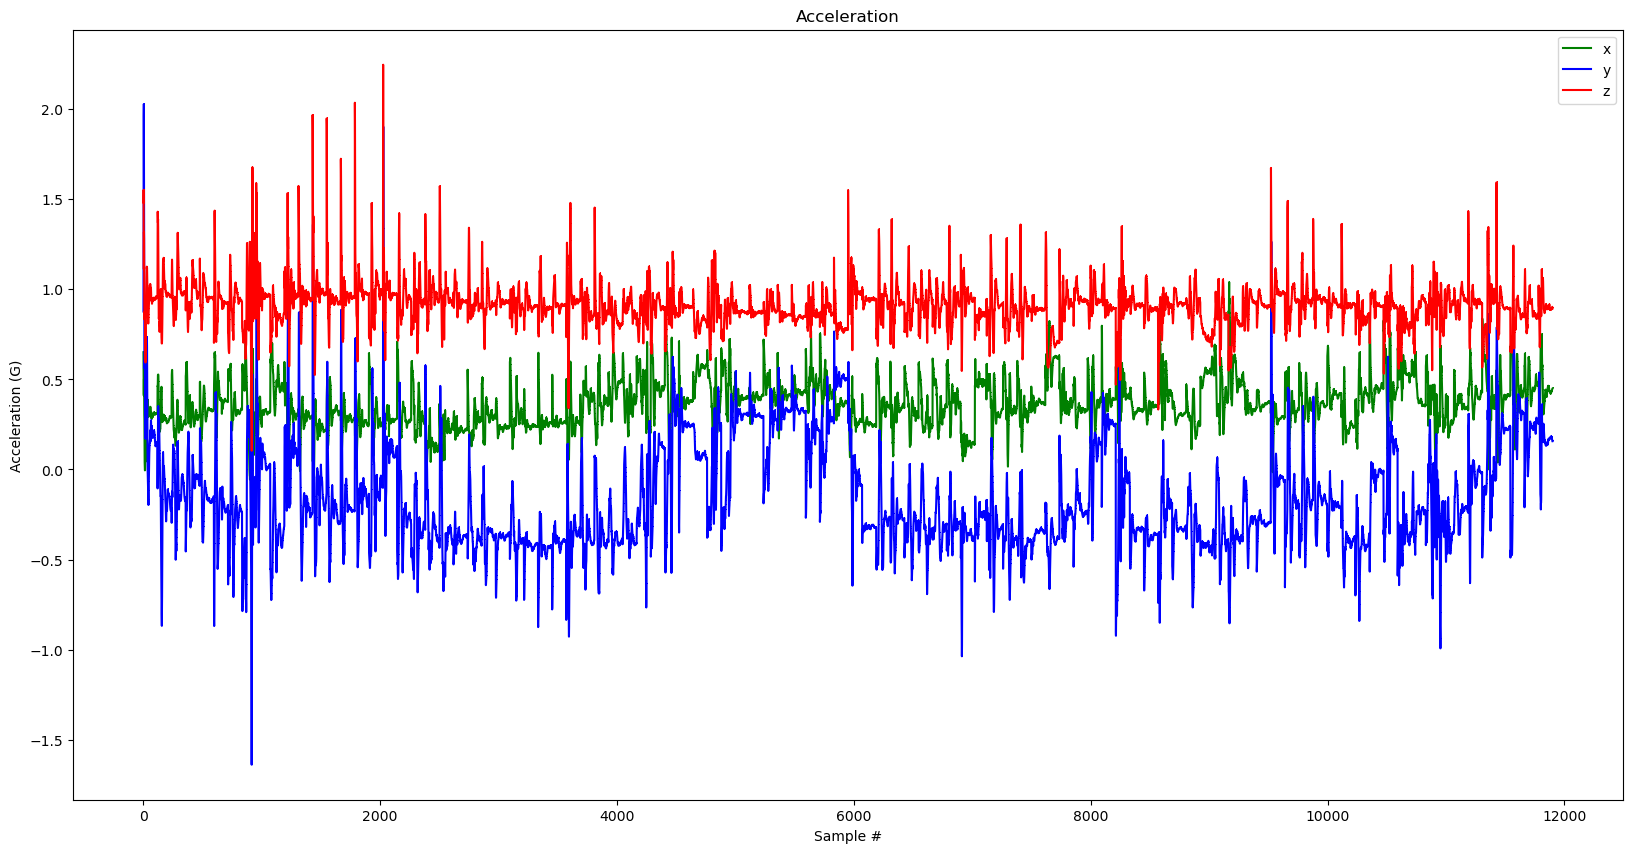

/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/2880796761.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/2880796761.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
/var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/ipykernel_85450/2880796761.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


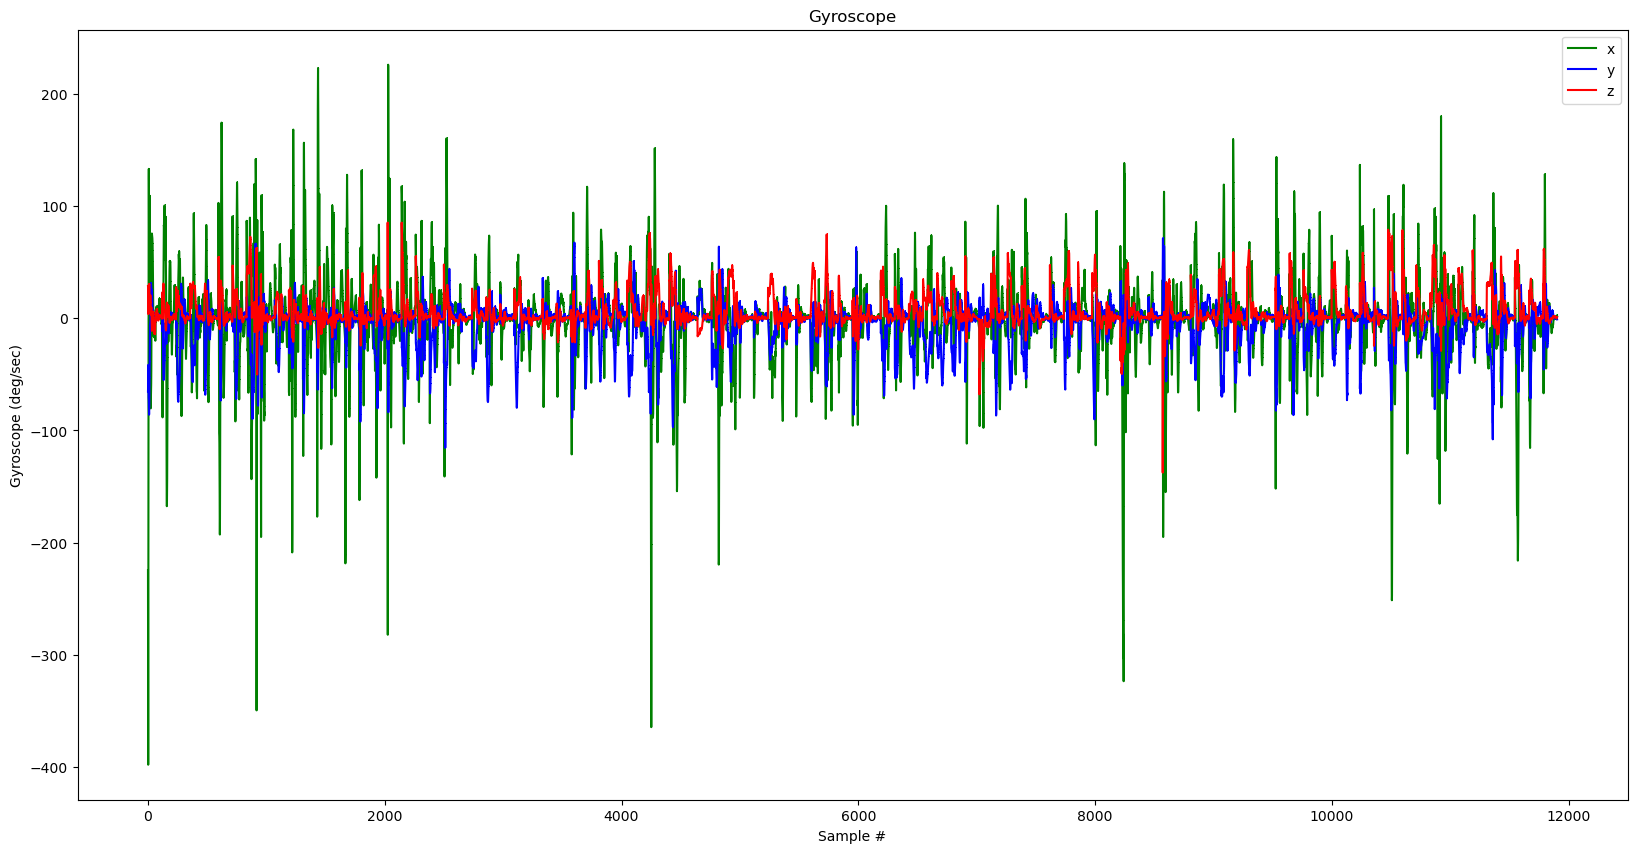

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "FINAL_BACK_SLOUCH.csv"

df = pd.read_csv(filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `GESTURES` list with the gesture data you've collected in `.csv` format.


In [2]:
from numpy import math

alpha = 0.99 # filter coefficient
dt = 1/119 # time step in seconds

def complementary_filter(acc, gyro, prev_roll, prev_pitch):
        ax, ay, az = acc
        gx, gy, gz = gyro

        # Calculate pitch and roll using a complementary filter
        pitch = alpha * (prev_pitch + gx * dt) + (1 - alpha) * (180.0 / math.pi) * \
                math.atan2(-ax, math.sqrt(ay**2 + az**2))
        roll = alpha * (prev_roll + gy * dt) + (1 - alpha) * (180.0 / math.pi) * \
                math.atan2(ay, math.sqrt(ax**2 + az**2))

        return roll, pitch

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# initialize minimum and maximum values for roll and pitch
min_roll = float('inf')
max_roll = float('-inf')
min_pitch = float('inf')
max_pitch = float('-inf')

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "FRONT_SLOUCH",
    "BACK_SLOUCH",
    "RIGHT_SLOUCH",
    "LEFT_SLOUCH"
    # "STRAIGHT"
]

# take note .. why (just for ease of finding)
SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  # ro=[]
  # pit=[]
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("FINAL_" + gesture + ".csv")

  if gesture == "STRAIGHT":
    df['Experiment'] = df.index // 119
    random_ids = np.random.choice(df['Experiment'].unique(), size=100, replace=False)
    df = df[df['Experiment'].isin(random_ids)]
    df = df.reset_index(drop=True)   
    df = df.drop(columns=['Experiment']) 

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  prev_roll = 0.0 # previous roll angle calculated by the filter
  prev_pitch = 0.0 # previous pitch angle calculated by the filter
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      
      list_x = list(range(70,120)) 
      list_x = [x + i * SAMPLES_PER_GESTURE for x in list_x]
      if index in list_x:
        continue

      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4.. 
      # - gyroscope is between: -2000 to +2000.. 

      # Call the complementary_filter function
      roll, pitch = complementary_filter((df['aX'][index], df['aY'][index], df['aZ'][index]),\
                                          (df['gX'][index], df['gY'][index], df['gZ'][index]), prev_roll, prev_pitch)

      # ro.append(roll)
      # pit.append(pitch)

      tensor += [
          # (df['aX'][index] + 4) / 8,
          # (df['aY'][index] + 4) / 8,
          # (df['aZ'][index] + 4) / 8,
          # (df['gX'][index] + 2000) / 4000,
          # (df['gY'][index] + 2000) / 4000,
          # (df['gZ'][index] + 2000) / 4000,
          roll,
          pitch
      ]

    inputs.append(tensor)
    outputs.append(output)

  print(df.describe())

inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.11.0

Processing index 0 for gesture 'FRONT_SLOUCH'.
	There are 100 recordings of the FRONT_SLOUCH gesture.
                 aX            aY            aZ            gX            gY  \
count  11900.000000  11900.000000  11900.000000  11900.000000  11900.000000   
mean       0.566955     -0.528517      0.679352      4.471018      3.289723   
std        0.090041      0.160704      0.128935     23.961078     10.275627   
min        0.214000     -1.587000      0.221000   -120.117000    -48.706000   
25%        0.518000     -0.621000      0.596000     -2.625000     -0.854000   
50%        0.555000     -0.509000      0.722000      0.977000      0.793000   
75%        0.616000     -0.413000      0.778000      6.714000      2.686000   
max        1.052000     -0.125000      1.109000    296.082000     76.355000   

                 gZ  
count  11900.000000  
mean       0.703586  
std        5.996253  
min      -93.628000  
25%       -0.793000  
50%        0.549000  
75%

In [4]:
inputs.shape

(400, 420)

In [7]:
GESTURES

['FRONT_SLOUCH', 'BACK_SLOUCH', 'RIGHT_SLOUCH', 'LEFT_SLOUCH']

In [8]:
ONE_HOT_ENCODED_GESTURES # first is punch, then flex

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [14]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [16]:
inputs_train.shape, inputs_test.shape, inputs_validate.shape

((240, 420), (80, 420), (80, 420))

## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [32]:
from tensorflow import keras

# Build the model
model = keras.Sequential([
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(NUM_GESTURES, activation='softmax')
])

# Compile the model
optimizer = keras.optimizers.SGD(learning_rate=0.006)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

history = model.fit(inputs_train, outputs_train, epochs=500, batch_size=8,
                    validation_data=(inputs_validate, outputs_validate))
# 93%- roll pitch, perfect graph

Epoch 1/500


2023-04-11 23:38:38.335421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


30/30 [==============================] - 1s 7ms/step - loss: 0.2073 - accuracy: 0.2250 - val_loss: 0.1809 - val_accuracy: 0.3875
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.2250 - val_loss: 0.1826 - val_accuracy: 0.3875
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.2250 - val_loss: 0.1837 - val_accuracy: 0.3875
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.2292 - val_loss: 0.1846 - val_accuracy: 0.3875
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.2458 - val_loss: 0.1855 - val_accuracy: 0.4375
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.3042 - val_loss: 0.1857 - val_accuracy: 0.4250
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.2500 - val_loss: 0.1865 - val_accuracy: 0.2125
Epoch 8/500
30/30 [======

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (8, 80)                   33680     
                                                                 
 dense_3 (Dense)             (8, 20)                   1620      
                                                                 
 dense_4 (Dense)             (8, 4)                    84        
                                                                 
Total params: 35,384
Trainable params: 35,384
Non-trainable params: 0
_________________________________________________________________


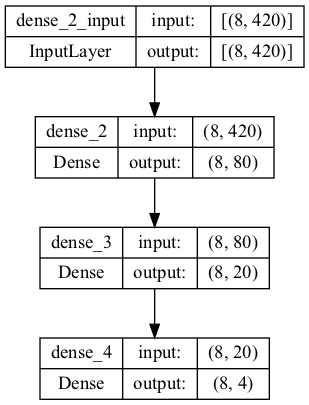

In [34]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Verify 

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

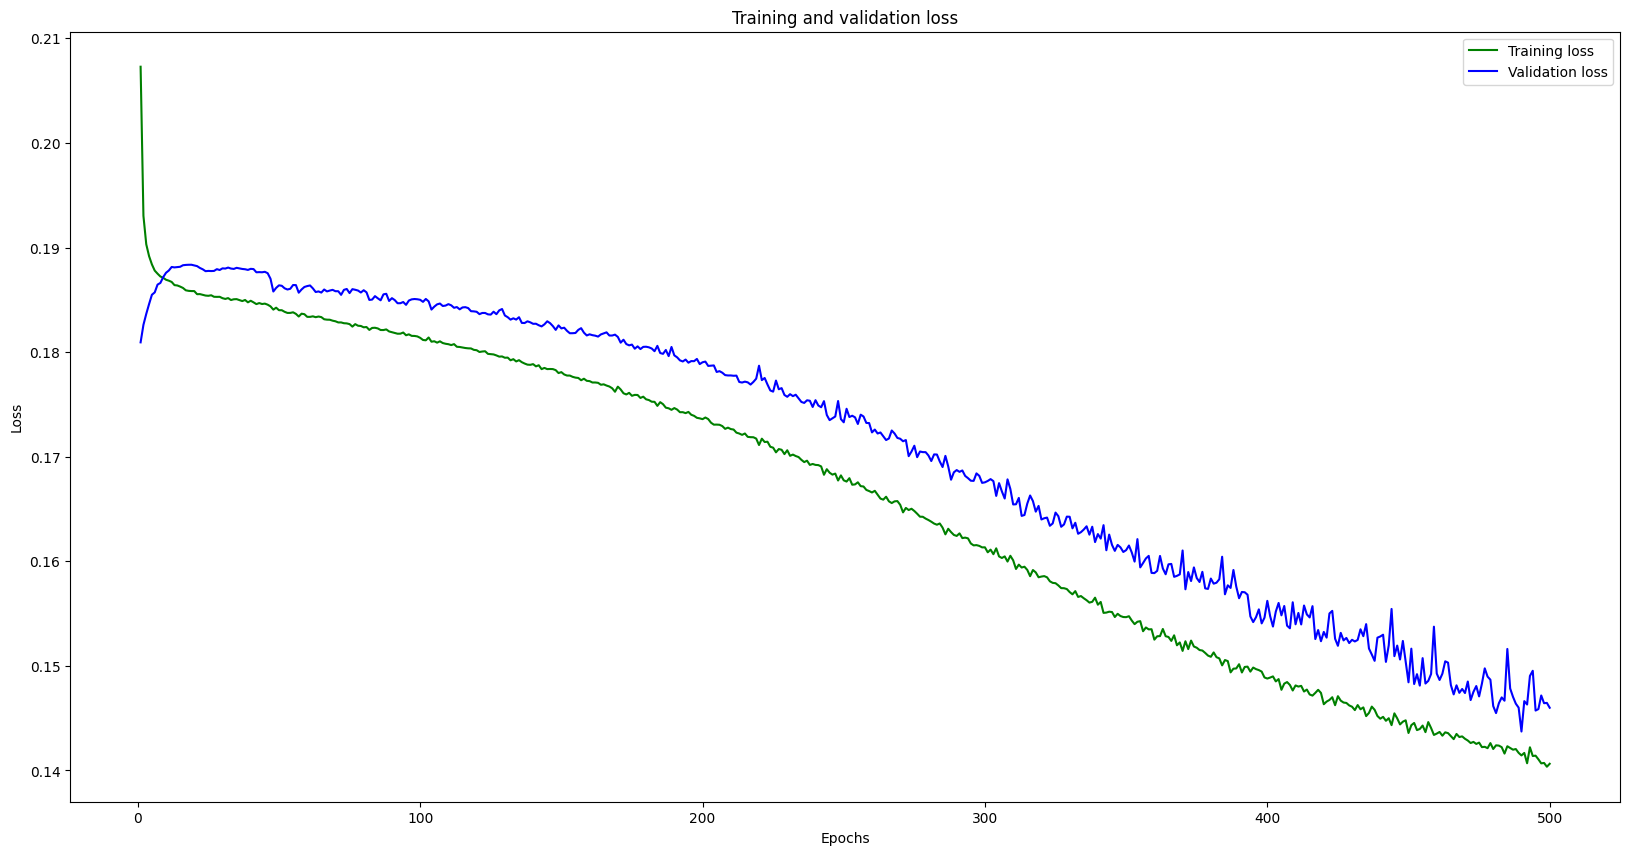

[20.0, 10.0]


<Figure size 2000x1000 with 0 Axes>

In [35]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig("./hi.jpg")

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

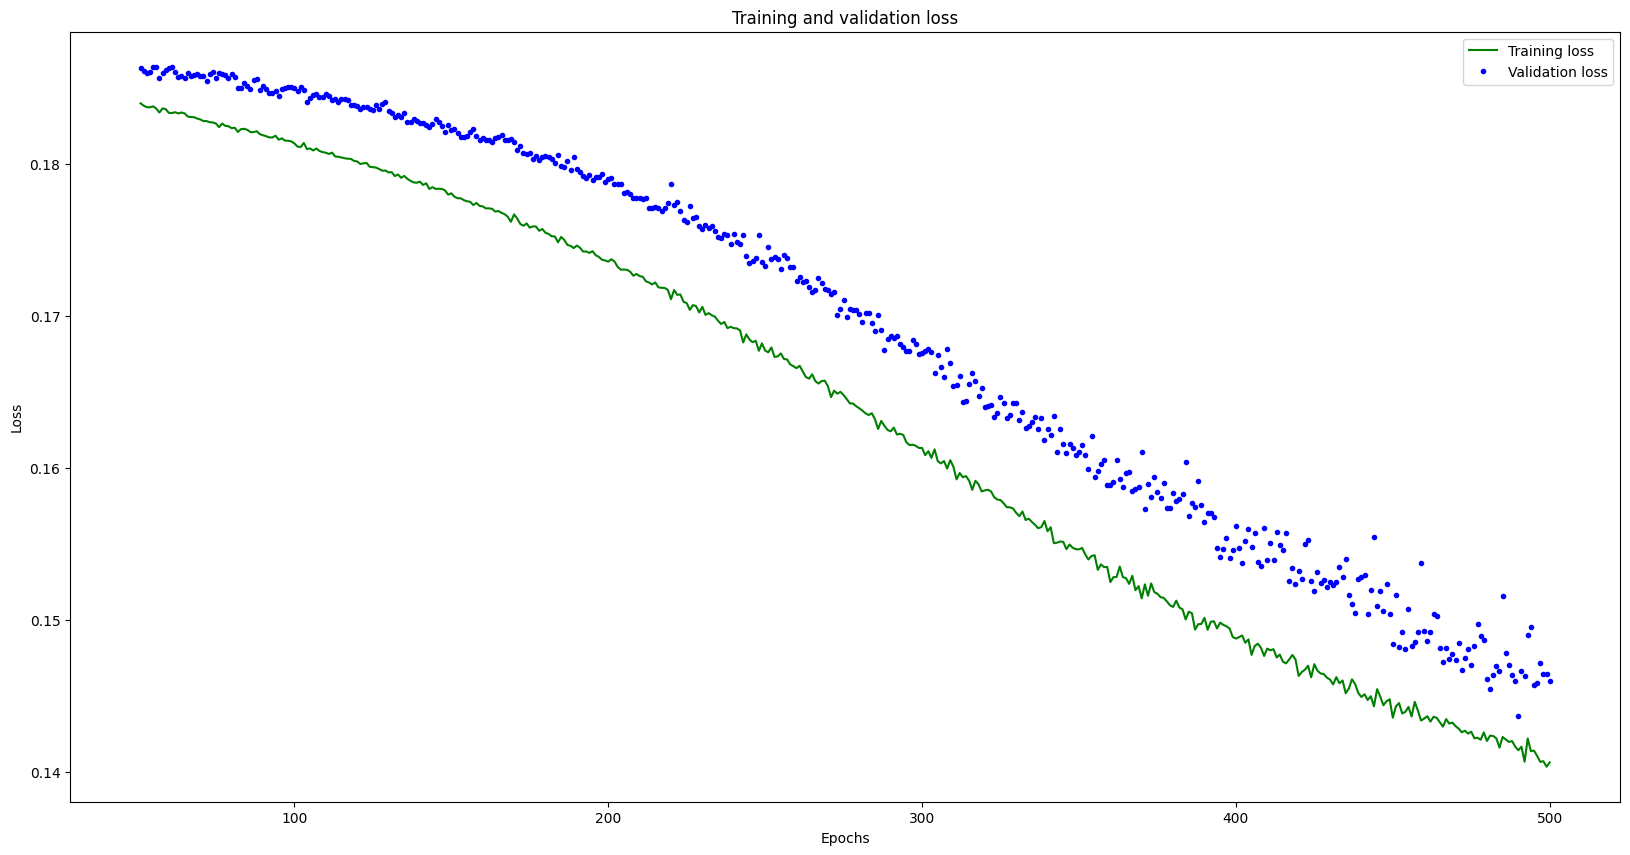

<Figure size 2000x1000 with 0 Axes>

In [37]:
# graph the loss again skipping a bit of the start
SKIP = 50
plt.plot(epochs[SKIP:], loss[SKIP:], 'g', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig("./hi2.jpg")

 ### Graph the Accuracy



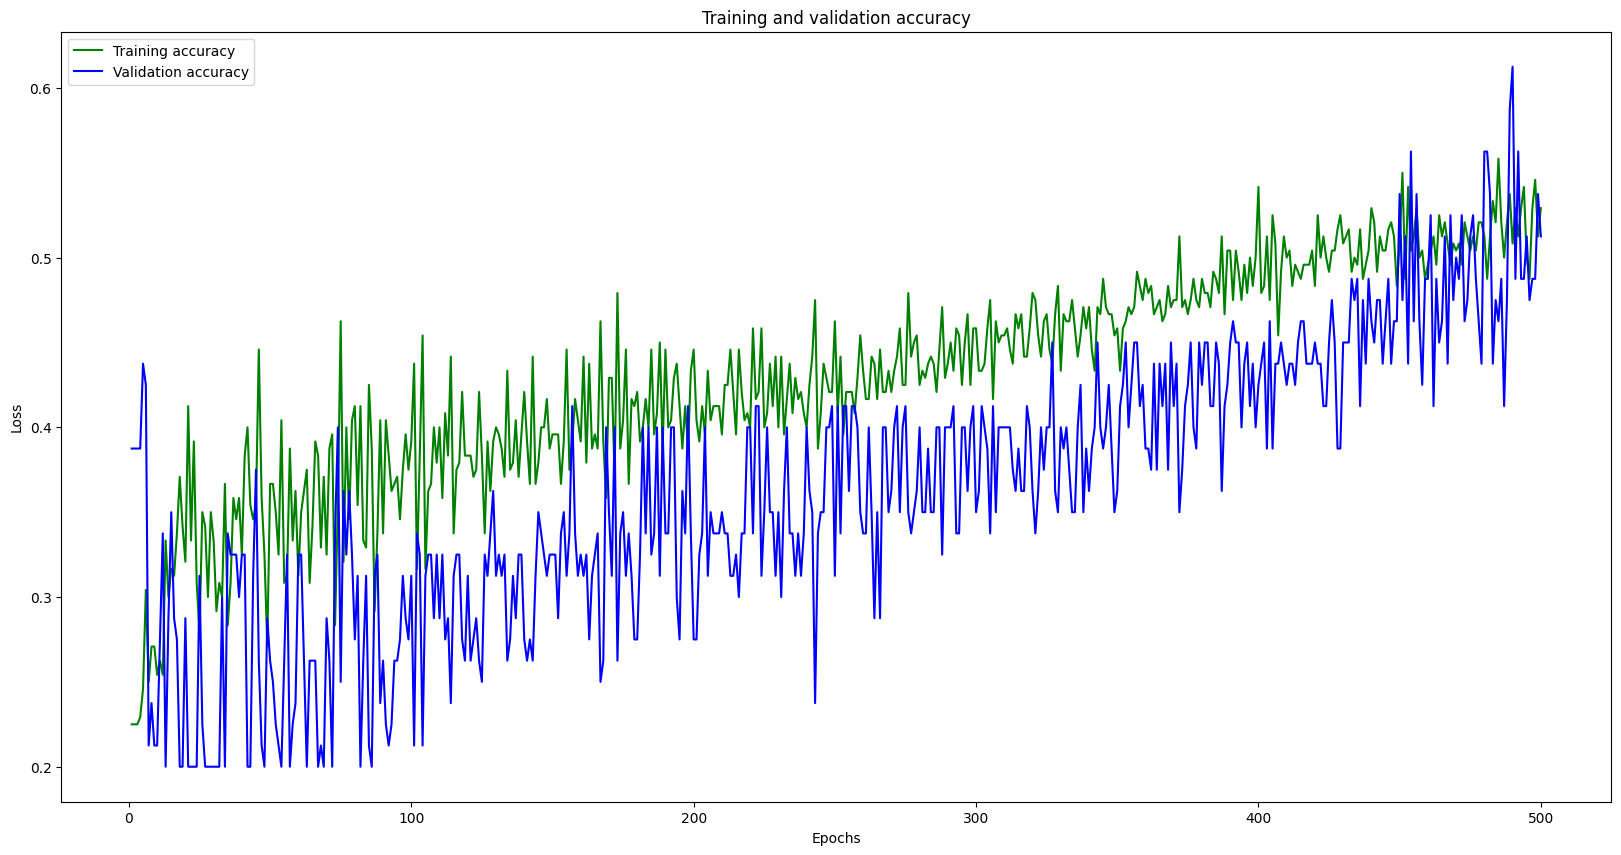

[20.0, 10.0]


In [38]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



In [40]:
# # graph of mean absolute error
# mae = history.history['mae']
# val_mae = history.history['val_mae']
# plt.plot(epochs[SKIP:], mae[SKIP:], 'g', label='Training MAE')
# plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b', label='Validation MAE')
# plt.title('Training and validation mean absolute error')
# plt.xlabel('Epochs')
# plt.ylabel('MAE')
# plt.legend()
# plt.show()

# plt.savefig("./hi3.jpg")

### Run with Test Data
Put our test data into the model and plot the predictions


In [43]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(outputs_test, axis=1)

accuracy = (predicted_labels == true_labels).mean()

print("Accuracy: ", accuracy)

print("predictions =\n", predicted_labels)
print("actual =\n", true_labels)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

3/3 [==============================] - 0s 2ms/step
Accuracy:  0.4625
predictions =
 [1 3 2 1 1 2 1 1 1 1 1 1 1 2 2 0 1 3 1 2 0 0 3 0 0 1 0 0 0 2 1 1 2 0 1 0 0
 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 3 0 3 0 2 1 0 3 3 0 0 1 1 0 1 0 1 1 1 1
 2 0 1 1 1 1]
actual =
 [1 0 2 3 2 0 0 1 3 1 2 1 0 2 0 0 1 2 1 0 3 2 3 3 2 2 0 0 0 2 0 2 1 0 1 2 0
 3 0 1 1 1 2 3 2 1 0 0 2 2 2 3 2 2 3 2 3 0 0 1 2 3 2 3 2 1 1 3 3 3 1 2 1 2
 0 0 1 1 0 1]
[[11  4  5  1]
 [ 0 19  1  0]
 [12  7  3  2]
 [ 7  4  0  4]]


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = np.array([[20 , 0 , 0 , 1], [ 2 ,17 , 1 , 0], [ 0 , 2 , 22 , 0], [ 0 , 0 , 0 , 15]])

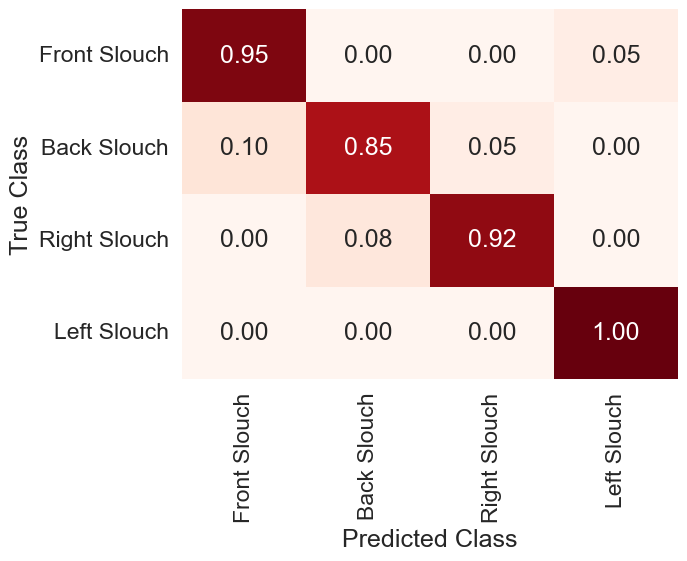

In [2]:
# Get the confusion matrix
# confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

# Normalize the values in the confusion matrix
normalized_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap with the normalized confusion matrix
sns.set(font_scale=1.5)
sns.heatmap(normalized_matrix, annot=True, fmt='.2f', cmap='Reds', cbar=False,
            xticklabels=['Front Slouch', 'Back Slouch', 'Right Slouch', 'Left Slouch'],
            yticklabels=['Front Slouch', 'Back Slouch', 'Right Slouch', 'Left Slouch'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [44]:
# Convert the model to the TensorFlow Lite format without quantization
# why not with quantization?
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



INFO:tensorflow:Assets written to: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmpm6erk4il/assets


INFO:tensorflow:Assets written to: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmpm6erk4il/assets


Model is 143648 bytes


2023-04-12 00:04:35.916150: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-04-12 00:04:35.917071: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-04-12 00:04:35.921829: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmpm6erk4il
2023-04-12 00:04:35.923603: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-12 00:04:35.923628: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmpm6erk4il
2023-04-12 00:04:35.929275: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-04-12 00:04:35.930565: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-04-12 00:04:36.004761: I tensorflow/cc/saved_model/loader.

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# why???
def rep_dataset_gen():
    for val in inputs_test:
        yield [np.array(val, dtype=np.float32, ndmin = 2)]
        # yield [tf.dtypes.cast(val, tf.float32)]

converter.representative_dataset = rep_dataset_gen
tflite_model_3 = converter.convert()
open('gesture_model_quantized.tflite', 'wb').write(tflite_model_3)

basic_model_size = os.path.getsize("gesture_model_quantized.tflite")
print("Quantized model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmp5o4sqvch/assets


INFO:tensorflow:Assets written to: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmp5o4sqvch/assets


Quantized model is 38552 bytes


/Users/rachita7/opt/anaconda3/envs/tinyml/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-04-12 00:04:38.003209: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-04-12 00:04:38.003226: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-04-12 00:04:38.003462: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmp5o4sqvch
2023-04-12 00:04:38.007717: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-12 00:04:38.007741: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/gk/5cljvyn147b24dxkknrs64rh0000gn/T/tmp5o4sqvch
2023-04-12 00:0

## Encode the Model in an Arduino Header File 

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [934]:
!echo "const unsigned char model[] = {" > model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 333,726 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


In [935]:
!echo "const unsigned char model[] = {" > model_quantised.h
!cat gesture_model_quantized.tflite | xxd -i      >> model_quantised.h
!echo "};"                              >> model_quantised.h

import os
model_h_size = os.path.getsize("model_quantised.h")
print(f"Header file, model_quantised.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model_quantised.h to download the file.")

Header file, model_quantised.h, is 99,934 bytes.

Open the side panel (refresh if needed). Double click model_quantised.h to download the file.


# Classifying IMU Data

Now it's time to switch back to the tutorial instructions and run our new model on the Arduino Nano 33 BLE Sense to classify the accelerometer and gyroscope data.
